**Nida Kayaduman 29063**

**Distance Metrics in High Dimensional Space**

This code defines a set of functions to examine the behavior of distance metrics between points in high-dimensional spaces. Below are detailed descriptions of the functions and how to run an experiment.

**Functions**

**random_points**
It is a function that produces num_points number of random points of size num_dimensions from the standard normal distribution.

**average_distance_sp**
Calculates the average Euclidean distance of a selected point (selected_point) to all other points in the set of points (points).

**minimum_distance_sp**
Calculates the minimum Euclidean distance of a selected point to all other points in the set of points. Distance to self is not taken into account.

**closest_to_average_ratio**
Calculates the ratio of the minimum distance of a point to the closest point (min_dist) and the average distance (avg_dist).

**experiment_and_visualization**
Runs experiments for the given dims sizes. For each dimension, num_points generates a number of points and num_trials times calculates the average and minimum distances of a randomly selected point, and the nearest-to-average ratio. Then, it returns the mean and standard deviation of these values.

----------------------------------------------------

The results are shown as line graphs as average distance, minimum distance, and nearest-to-average ratio versus number of dimensions. 

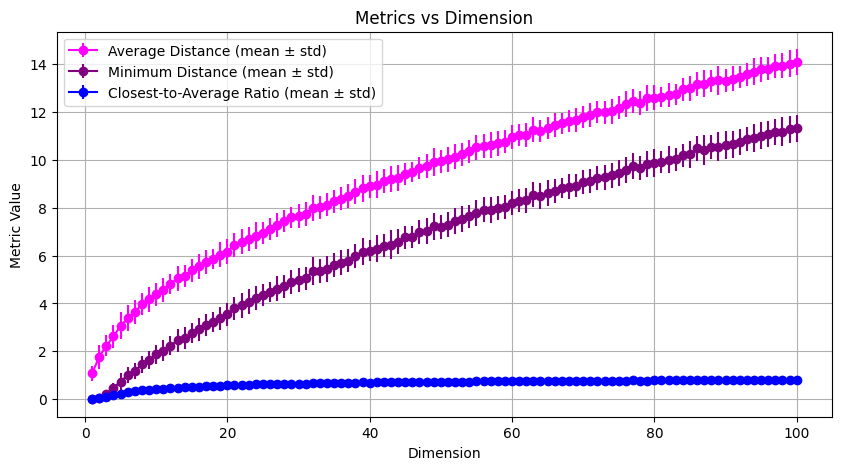

In [12]:
import numpy as np
import matplotlib.pyplot as plt


def random_points(num_points, num_dimensions):
    return np.random.randn(num_points, num_dimensions)


def average_distance_sp(points, selected_point):
    differences = points - selected_point
    distances = np.sqrt(np.sum(differences ** 2, axis=1))
    return np.mean(distances)

def minimum_distance_sp(points, selected_point):
    
    differences = points - selected_point
    
    distances = np.sqrt(np.sum(differences ** 2, axis=1))
    
    distances = distances[distances != 0]
 
    min_distance = np.min(distances)
    return min_distance

def closest_to_average_ratio(min_dist, avg_dist):
    return min_dist / avg_dist

def experiment_and_visualization(dims, num_points=1000, num_trials=100):
    mean_avg_distances = []
    mean_min_distances = []
    mean_ratios = []
    std_avg_distances = []
    std_min_distances = []
    std_ratios = []

    for d in dims:
        avg_distances = []
        min_distances = []
        ratios = []
        
        for _ in range(num_trials):
            points = random_points(num_points, d)
            selected_point = points[np.random.randint(0, num_points)]

            avg_dist = average_distance_sp(points, selected_point)
            min_dist = minimum_distance_sp(points, selected_point)
            ratio = closest_to_average_ratio(min_dist, avg_dist)
            
            avg_distances.append(avg_dist)
            min_distances.append(min_dist)
            ratios.append(ratio)

       
        mean_avg_distances.append(np.mean(avg_distances))
        mean_min_distances.append(np.mean(min_distances))
        mean_ratios.append(np.mean(ratios))
        std_avg_distances.append(np.std(avg_distances))
        std_min_distances.append(np.std(min_distances))
        std_ratios.append(np.std(ratios))
    
    return (mean_avg_distances, mean_min_distances, mean_ratios,
            std_avg_distances, std_min_distances, std_ratios)


dims = range(1, 101)
results = experiment_and_visualization(dims)


plt.figure(figsize=(10, 5))


plt.errorbar(dims, results[0], yerr=results[3], label='Average Distance (mean ± std)', fmt='-o', color='magenta')
plt.errorbar(dims, results[1], yerr=results[4], label='Minimum Distance (mean ± std)', fmt='-o', color='purple')
plt.errorbar(dims, results[2], yerr=results[5], label='Closest-to-Average Ratio (mean ± std)', fmt='-o', color='blue')


plt.xlabel('Dimension')
plt.ylabel('Metric Value')
plt.title('Metrics vs Dimension')
plt.legend()
plt.grid(True)
plt.show()





**Average Distance (pink line)**: The average distance increases as the number of dimensions increases. This shows that in high-dimensional spaces, data points become farther apart. This linear increase reflects a phenomenon known as the curse of size; As the number of dimensions increases, the average distance between data points also increases. This makes it difficult to analyze and make sense of data points in high-dimensional spaces because the points become isolated relative to each other.

**The Minimum Distance (purple line)** chart shows how the distance of a data point to the nearest other data point changes as the number of dimensions increases. Compared to the increase in average distance, the rate of increase is lower in this case. This is because instead of averaging the distances of each point to all other points in the data set, only the distance to the closest point is calculated. This increase reveals that as the number of dimensions increases, the idea of 'nearest neighbor' weakens and this neighbor becomes further away. Moreover, with the increase in size, even the closest neighbor can move significantly further away. This is of critical importance considering that algorithms often work based on nearest neighbor information. If even the closest neighbors are geographically distant from each other, the efficiency of these algorithms can be seriously affected. To summarize, in high-dimensional space, the concept of a point's 'nearest neighbor' may not be as meaningful as in lower dimensions, which can reduce efficiency.

The near-constant trend of the ratio in the **Closest-to-Average Ratio (blue line)** graph indicates that the proportional relationship between the nearest neighbor of any data point and the average distance between all other points does not change substantially as the number of dimensions increases. In high-dimensional spaces, this may mean a homogeneity between data points; that is, all points tend to be almost equally far from each other. The interpretation of all this is deeply connected to the curse of dimensions. The concept of the curse of dimensions states that data points in higher dimensional spaces behave differently than they do in lower dimensions.

-----------------------------------------------------------------------------

This piece of code can be used to examine distance distributions between randomly generated points in spaces of dimensions 2, 5, 10 and 100. For each dimension, a histogram of pairwise distances is plotted, and these histograms show how distance distributions change as the number of dimensions increases.

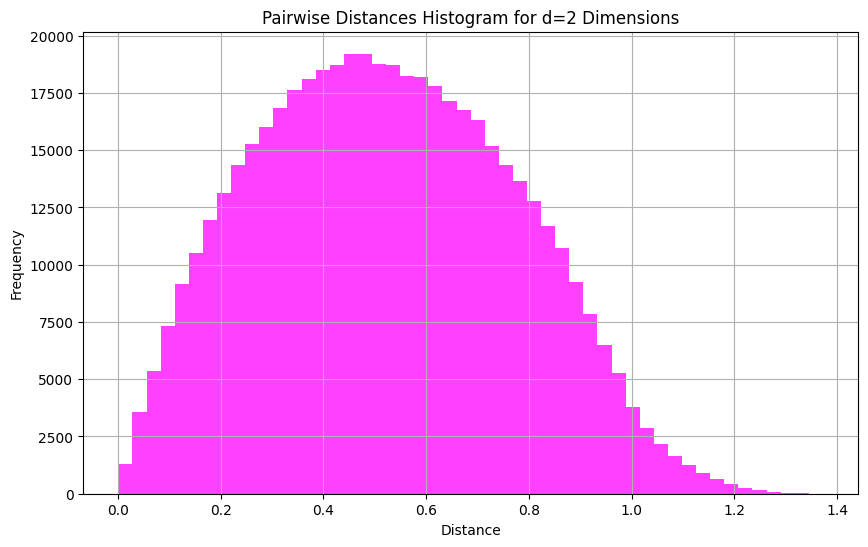

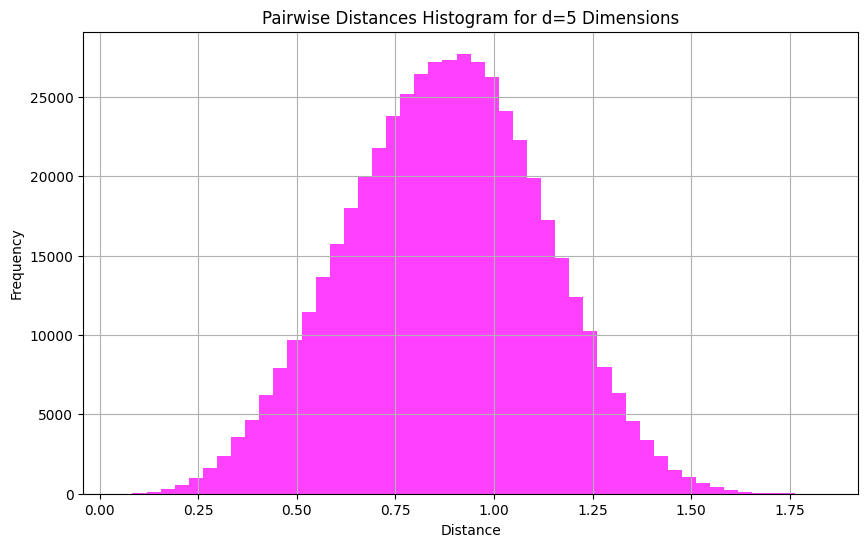

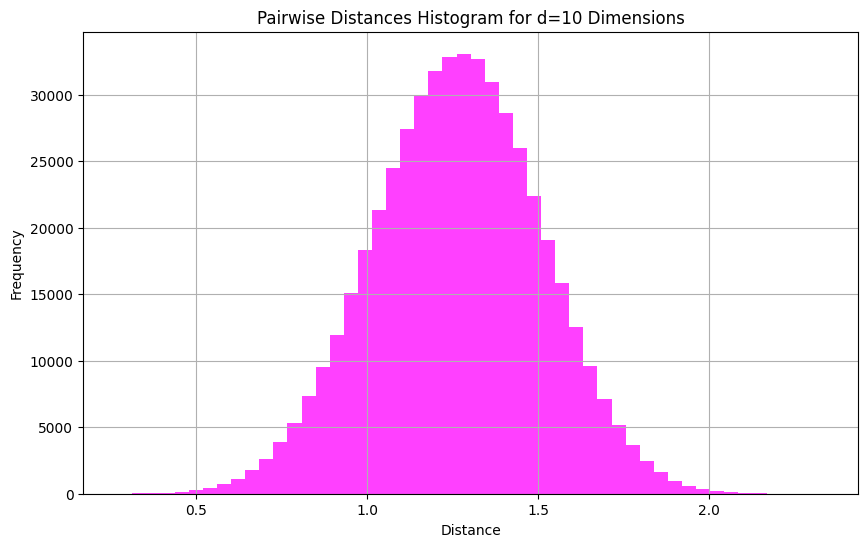

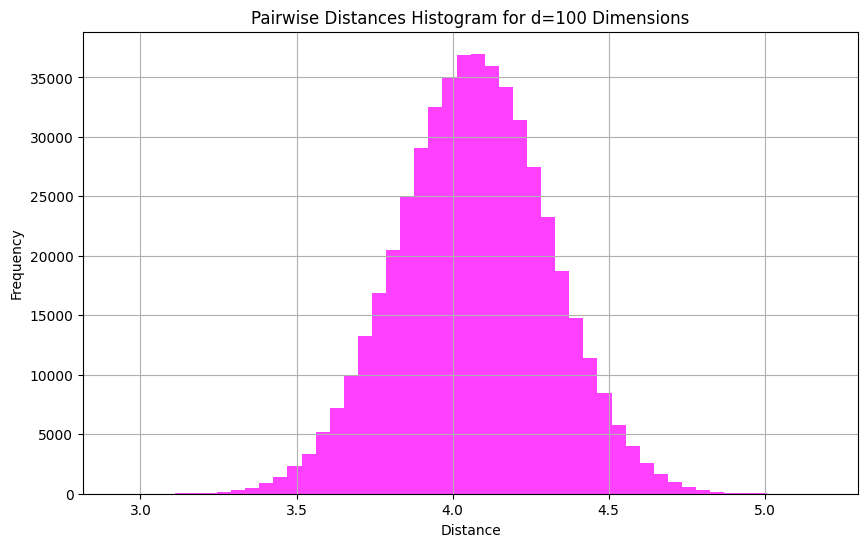

In [13]:


def random_points(num_points, dimensions):
    return np.random.rand(num_points, dimensions)

def plot_pairwise_distances_histograms(dimensions, num_points=1000):
    for d in dimensions:
        points = random_points(num_points, d)
        
       
        dist_matrix = np.sqrt(np.sum((points[:, np.newaxis, :] - points[np.newaxis, :, :]) ** 2, axis=-1))
        distances = dist_matrix[np.triu_indices(num_points, k=1)]
        
      
        plt.figure(figsize=(10, 6))
        plt.hist(distances, bins=50, alpha=0.75, color='magenta')
        plt.title(f'Pairwise Distances Histogram for d={d} Dimensions')
        plt.xlabel('Distance')
        plt.ylabel('Frequency')
        plt.grid(True)
        plt.show()


plot_pairwise_distances_histograms([2, 5, 10, 100])


**Two-Dimensional Space (d=2)**: The histogram shows a high frequency at close distances, while the frequency decreases at long distances. This shows that in a two-dimensional space, random points tend to be closer together. The greater frequency of short distances between points is a sign that randomly placed points in two-dimensional space are densely grouped together. This is consistent with intuitive expectations in a low-dimensional space; where average distances between points can be relatively short, and distances between a point's neighbors are generally uniformly distributed.

**Five-Dimensional Space (d=5)**: The histogram covers a slightly larger distance range and its peak is at a lower distance value than in two-dimensional space. In five-dimensional space, the distances between points are spread over a wider range, indicating that points are slightly further apart in five dimensions. This reflects the increasing dispersion of distances with increasing dimensions, indicating a less concentration of points in this space.

**Ten-Dimensional Space (d=10)**: In ten-dimensional space, the histogram begins to become flatter and its peak indicates even lower frequency and a wider distance distribution. This shows that with the increasing number of dimensions, the distances between points spread further and these distances begin to vary more. In a ten-dimensional space, the distances between points are expected to be more homogeneous and the points are more equally distributed from each other, which is an indication that the points have become isolated relative to each other.

**Hundred-Dimensional Space (d=100)**: In the hundred-dimensional space, the histogram covers a very wide distance range and its peak has almost turned into a straight line. This shows that in high-dimensional space the distances between points show a very homogeneous distribution, and points tend to be equidistant from each other. Here, the effects of the "curse of dimensions" are much more evident; because the distance differences between points are now so little noticeable that it becomes difficult to determine meaningful differences between points. This can significantly affect the performance of distance-based algorithms in high-dimensional data analysis and machine learning applications, thus requiring the use of methods such as dimensionality reduction techniques.

The width and shape of each histogram show how, as the number of dimensions increases, data points are more uniformly distributed from each other and how the standard deviation of this distribution increases. The widening and flattening of this distribution means that distinguishable structures between data points are lost and the effectiveness of distance-based metrics that can be used for data analysis decreases.

------------------------------------------------------------------

****************************************************************

**k-NN Classifier**


Fashion-MNIST is a data set consisting of a total of 70,000 grayscale images of 28x28 pixel size, prepared for machine learning algorithms to classify clothing products. This dataset contains clothing products from 10 different categories, and each category is equally represented by 7,000 images. The value of each pixel ranges from 0 to 255, which indicates the intensity of the pixel. Keras library is used to load the Fashion-MNIST dataset. The dataset consists of 60,000 training and 10,000 test samples.

In [47]:
from keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()


After successfully loading the dataset, it is important to check its dimensions. This is a preliminary step to verify that the dataset is loaded as expected and has the correct dimensions. The following Python code prints the dimensions of the training and testing partitions of the Fashion-MNIST dataset:

In [48]:
print("Training set dimensions:", x_train.shape)
print("Training labels sizes:", y_train.shape)
print("Test set dimensions:", x_test.shape)
print("Test labels dimensions:", y_test.shape)


Training set dimensions: (60000, 28, 28)
Training labels sizes: (60000,)
Test set dimensions: (10000, 28, 28)
Test labels dimensions: (10000,)


Using the `matplotlib.pyplot` module, the code builds a loop to visualize the first nine training images from the Fashion-MNIST dataset on a 3x3 grid. This visualization gives us a better understanding of what the dataset looks like and the classification task the models need to learn.

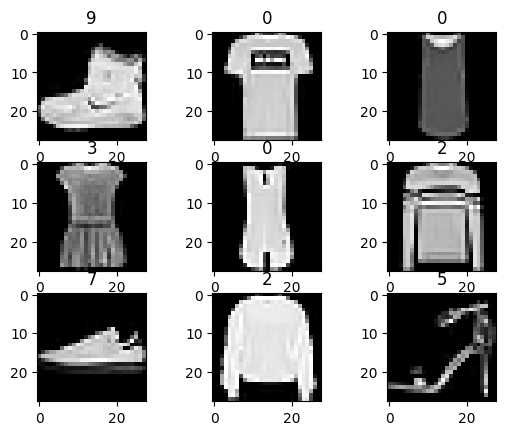

In [49]:
import matplotlib.pyplot as plt


for i in range(9):
    plt.subplot(330 + 1 + i)  
    plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))  
    plt.title(y_train[i])  
plt.show()


The `train_test_split` function is used to shuffle the data set and split it at a certain ratio. In this example, the `test_size=0.2` parameter specifies that 20% of the data set will be reserved as the validation set. The `random_state=42` parameter ensures that the function makes the same random selection, allowing the code to produce the same split even when run at different times. In this way, the repeatability of the model development process is ensured.

In [50]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)


This code block converts each 28x28 image into a 784 size vector using the `reshape` function. that is, this process turns the image into a single long vector. This process is the data preprocessing step required to make the k-NN classifier suitable for the data structure it expects.

In [51]:
x_train = x_train.reshape((x_train.shape[0], -1))
x_val = x_val.reshape((x_val.shape[0], -1))
x_test = x_test.reshape((x_test.shape[0], -1))


Using the scikit-learn library, the k-NN classifier `KNeighborsClassifier` is imported. A list containing different k values is then created to evaluate the performance of the model on the validation set. For each value of k, the model is trained (`knn.fit(x_train, y_train)`), predictions are made on the validation set (`y_pred = knn.predict(x_val)`) and the accuracy of these predictions (`accuracy_score(y_val, y_pred)`). is calculated. The calculated accuracy rates are added to a list (`accuracies`). This process helps us understand how well the model performs for each k value and allows the most appropriate k value to be selected. This process is used to compare the model's accuracy rates on the validation set, and the k value that gives the highest accuracy rate is considered the most suitable hyperparameter for the model.

In [52]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

k_values = [1, 3, 7, 12, 20, 30, 50, 75, 100]
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train) 
    y_pred = knn.predict(x_val)  
    accuracy = accuracy_score(y_val, y_pred)  
    accuracies.append(accuracy)  


This code block plots the accuracy scores of the k-NN classifier on the validation set for different values of 'k'. The accuracy scores obtained for each of the k values are shown as a line graph. After the graph, the index of the highest value in the list of accuracy scores is found and the k value corresponding to this index is assigned as `optimal_k`. This is the k value that provides the best performance of the model on the validation set, and we print the result to the screen.

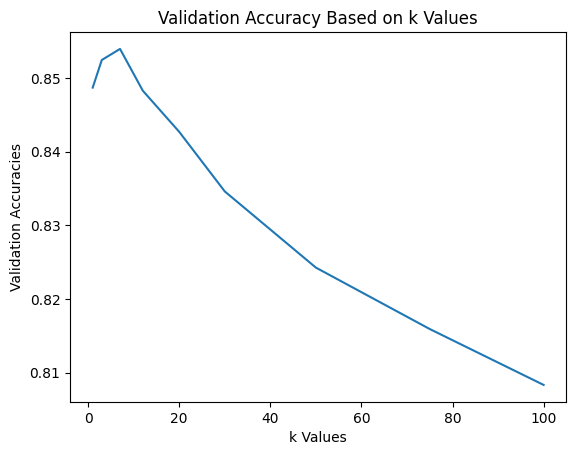

Best k value: 7


In [53]:
import matplotlib.pyplot as plt

plt.plot(k_values, accuracies)
plt.xlabel('k Values')
plt.ylabel('Validation Accuracies')
plt.title('Validation Accuracy Based on k Values')
plt.show()

optimal_k = k_values[accuracies.index(max(accuracies))]
print(f"Best k value: {optimal_k}")

This code block allows the model to be trained on a generic data set by combining the previously separated training and validation sets. A data set is created that includes all of the training and validation sets of the model. Then, the `KNeighborsClassifier` classifier is initialized with the previously determined best k value (`optimal_k`) and trained on this expanded training set. This process increases the generalizability of the model and makes it ready for performance evaluation on the final test set.

In [54]:
x_train_full = np.concatenate((x_train, x_val), axis=0)
y_train_full = np.concatenate((y_train, y_val), axis=0)

knn_final = KNeighborsClassifier(n_neighbors=optimal_k)
knn_final.fit(x_train_full, y_train_full)


KNeighborsClassifier(n_neighbors=7)

This code block makes predictions on the test set using the final k-NN model and calculates the accuracy of these predictions. The `accuracy_score` function returns the accuracy rate between the actual test labels (`y_test`) and the model's predictions (`y_pred_test`). As a result, the overall accuracy of the model on the test set is printed on the screen. This value is an indication of how well the model generalizes to new, unseen data.

In [55]:
y_pred_test = knn_final.predict(x_test)
test_accuracy = accuracy_score(y_test, y_pred_test)
print(f"Test set accuracy: {test_accuracy}")


Test set accuracy: 0.854


The `confusion_matrix` function is used to further analyze the performance of the model on the test set. This function produces a matrix containing the model's correct and incorrect predictions for each class. This matrix allows us to see which classes the model predicts correctly and which classes it confuses.

In [56]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_test)


This code block visualizes the calculated complexity matrix as a heat map. Using the `seaborn` and `matplotlib.pyplot` libraries, the complexity matrix is plotted in color.This visualization helps us easily understand which classes the model is confused between.

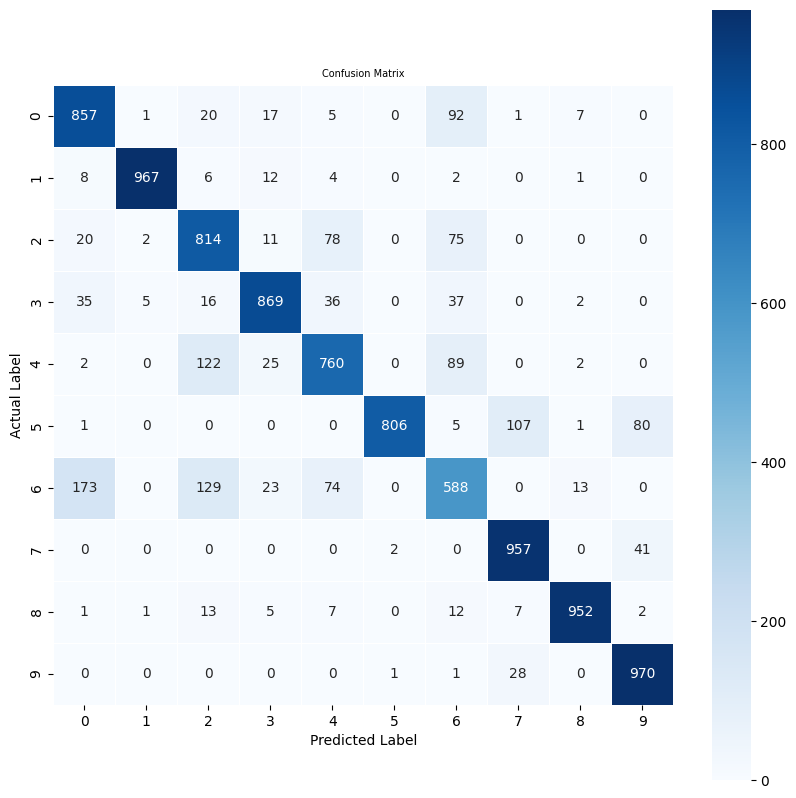

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt="d", linewidths=.5, square=True, cmap='Blues')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix', size = 7)
plt.show()


**Highest Correct Classification:**
In the matrix, the 'Ankle boot' (9) class has the highest number of correct classifications with 970 correct predictions. This indicates that the model performs quite well in distinguishing shoe type items. 'Trousers' (1) is another class with high accuracy with 967 correct predictions, indicating that the model can effectively distinguish trousers from other types of clothing.

**Highest Misclassification:**
The class 'Shirt' (6) is frequently confused with 'T-shirt/top' (0) and 'Pullover' (2). Although 588 correct guesses were made for 'Shirt', there were 173 misclassifications for 'T-shirt/top' and 129 misclassifications for 'Pullover'. This shows that three items of clothing may have similar properties and the model has difficulty distinguishing between these classes. The class 'Coat' (4) was also misclassified with 'Pullover' (2) 122 times and 'Dress' (3) 25 times, which may indicate similarity between outerwear elements.

**False Positives and False Negatives:**
The confusion between the labels 'Sandal' (5) and 'Sneaker' (7) within the 'Shoes' category is striking. 'Sandal' was confused with 'Sneaker' 80 times, while 'Sneaker' was confused with 'Sandal' only 41 times. This suggests that the model has difficulty distinguishing items from the footwear category, such as sandals and sneakers. Although both classes are included in the shoe category, the model may have difficulty distinguishing between these two classes.

**General evaluation:**
From this analysis, we can conclude that the model is able to distinguish some classes more easily than others, but suffers from confusion, especially between similar clothing items and types of shoes. Confusion of top clothing items such as 'Shirt', 'T-shirt/top' and 'Pullover' may be due to their similar construction.